<a href="https://colab.research.google.com/github/akashpatil1996/Forcasting_champagne_sales_using_ARIMA/blob/main/Champagne_sales_using_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries and reading dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from pmdarima.arima import auto_arima

In [ ]:
df = pd.read_csv('/content/Champaigne Sales.csv')
df.head()

,Month,Champagne sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


##Making sure there are no null values

In [ ]:
df.isnull().sum()

Month              0
Champagne sales    0
dtype: int64

In [ ]:
df.dtypes

Month              object
Champagne sales     int64
dtype: object

##Changing month column to datetime 

In [ ]:
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.dtypes

Month              datetime64[ns]
Champagne sales             int64
dtype: object

In [ ]:
df = df.set_index('Month')

##Plotting line plot

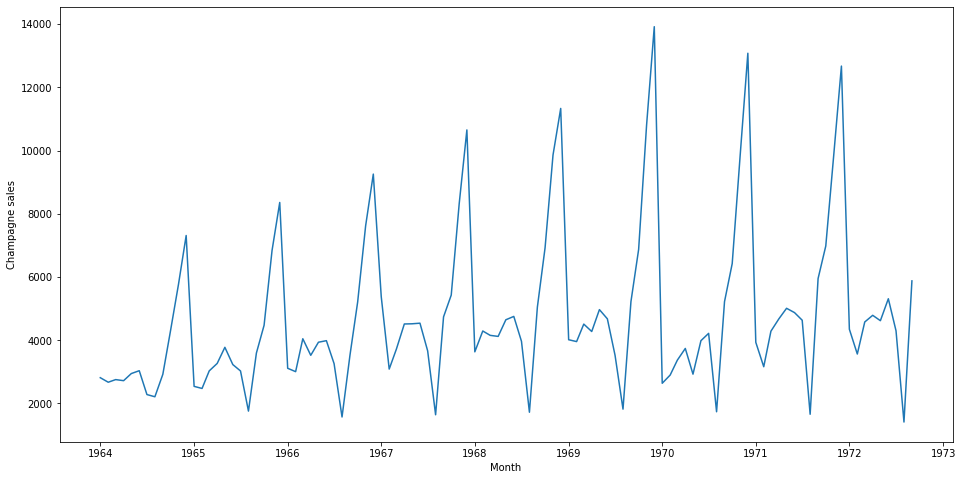

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(data = df, x = 'Month', y = 'Champagne sales') 

##Finding P-value and checking if differencing is necessary

In [ ]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.01, False)

##Train test split

In [ ]:
train = df[:85]
test = df[-20:]

##Finding the best values using auto arima

In [ ]:
model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, seasonal=True, random_state=20, trace = True, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.33 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.09 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.30 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=0.61 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.17 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.05 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.49 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.71 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.693, Time=1.45 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=0.42 sec
 ARIMA(1,1,3)(0,1,0)[12]     

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Fri, 27 Jan 2023   AIC                           1174.564
Time:                                     05:28:54   BIC                           1183.670
Sample:                                 01-01-1964   HQIC                          1178.189
                                      - 01-01-1971                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8411      0.152     -5.542      0.000      -1.139      -0.544
ma.L1          0.0512      0.167      0.307      0.759      -0.275       0.378
ma.L2         -0.8673      0.086    -10.133      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##Predicting the test data set using the best parameters

In [ ]:
pred = pd.DataFrame(model.predict(n_periods=20), index=test.index)
pred.columns = ['pred_sales']

<function matplotlib.pyplot.show(*args, **kw)>

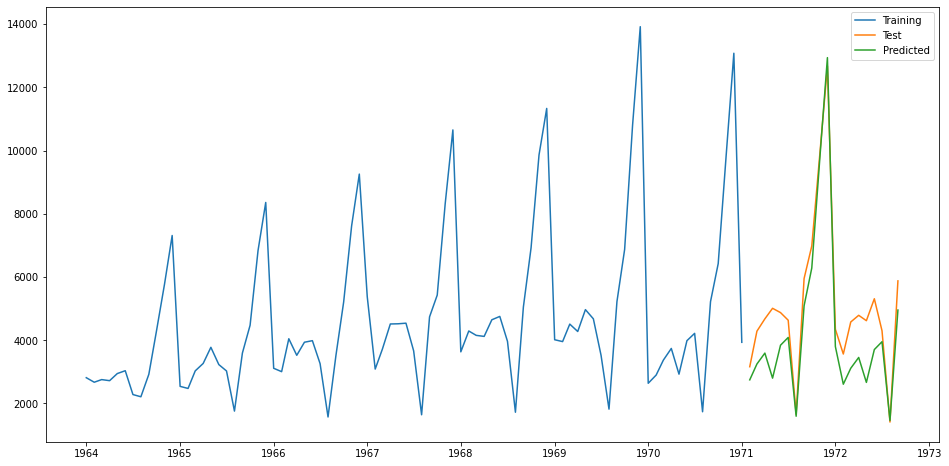

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train,label='Training')
plt.plot(test, label='Test')
plt.plot(pred, label='Predicted')
plt.legend(loc = 'Left corner')
plt.show

In [ ]:
test['predicted_sales'] = pred

##Checking r2 score

In [ ]:
from sklearn.metrics import r2_score
r2_score(test['Champagne sales'],test['predicted_sales'])

0.8114969330335862